# Analyzing Portfolio Risk and Return

Objective: Determine the fund of four new investment options with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas to include inin the client portfolios.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Read Data convert to daily returns

In [6]:
navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

navs_daily_returns_df = navs_df.pct_change().dropna()

navs_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489
...,...,...,...,...,...
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747


## Quantitative Analysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

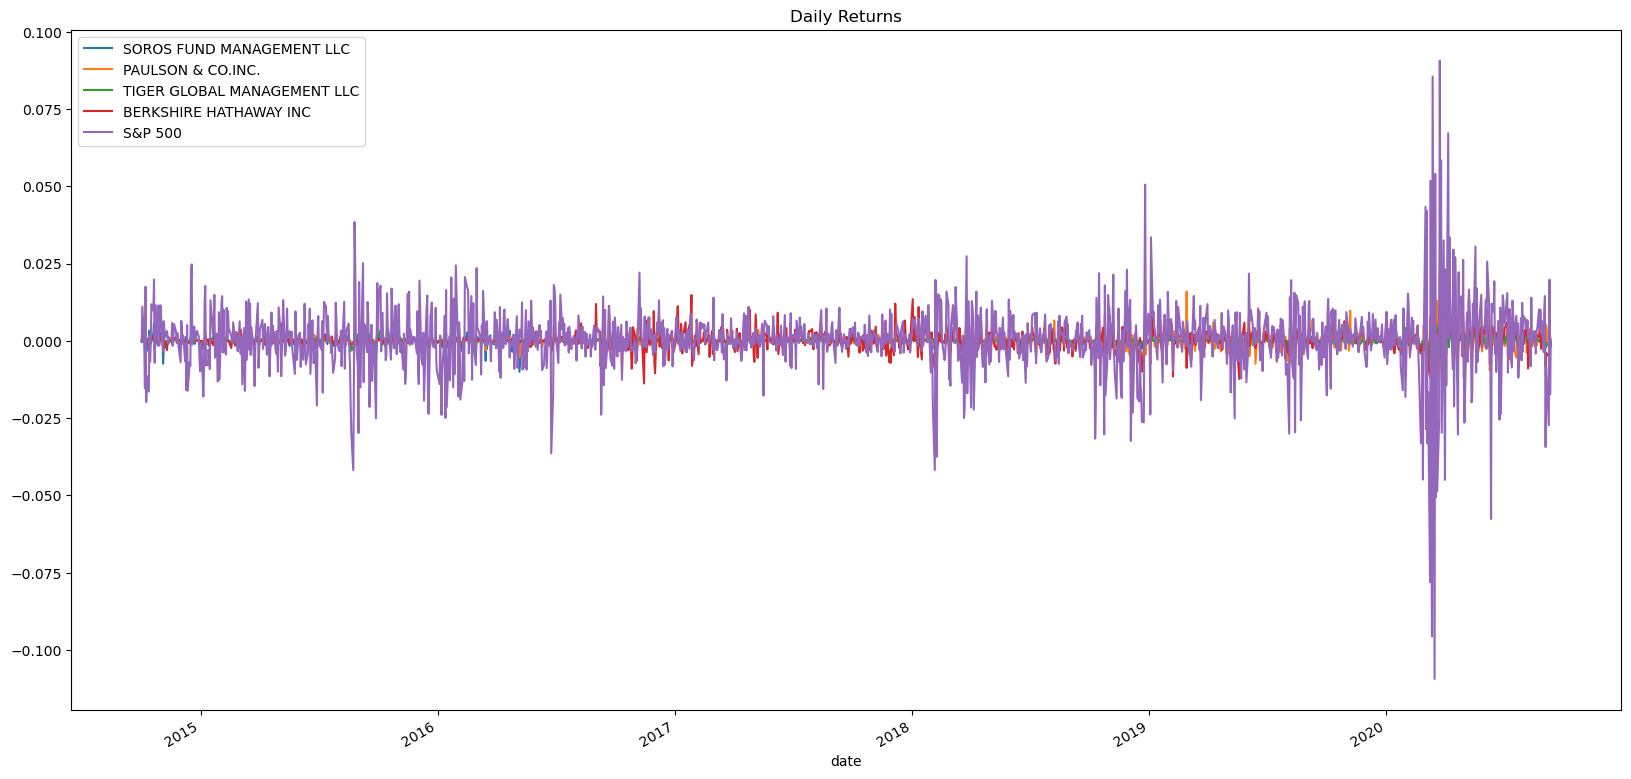

In [8]:
navs_daily_returns_df.plot(figsize=(20, 10), title="Daily Returns")